In [41]:
import numpy as np
from scipy import optimize
import matplotlib.pylab as plt

#Punto 1
$e^{x}-2= \cos(e^x-2)$


La raiz es 1.007623971657722


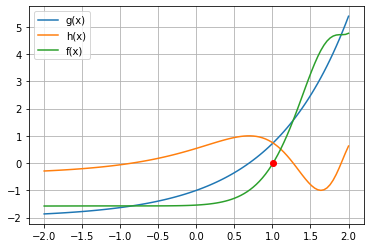

In [42]:
g = lambda x: np.exp(x)-2
h = lambda x: np.cos( np.exp(x)-2)
f = lambda x: g(x) - h(x)  # La funcion a la que se le busca la raiz

x = np.linspace(-2, 2, 100)

plt.plot(x, g(x), label="g(x)")
plt.plot(x, h(x), label="h(x)")
plt.plot(x, f(x), label="f(x)")  # Buscamos el cero de esta grafica
plt.grid()
plt.legend()

root = optimize.bisect(f, 1, 4) # Uso del metodo de biseccion
plt.plot(root,f(root),"ro")
print("La raiz es", root)

## Punto 2
\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}

La raiz es -2.2466864522685934e-16


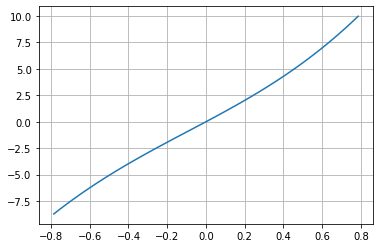

In [43]:
f = lambda omega : 2*omega**2 * (0.51+np.sin(omega))
g = lambda omega : -9.76* 0.5*(np.exp(omega)-np.exp(-omega)) # Creacion de dos funciones para hallar la raiz


h = lambda omega : f(omega)-g(omega) # Funcion a la que se le busca la raiz
omega = np.linspace(-np.pi/4, np.pi/4)

plt.figure()
plt.plot(omega,h(omega))
plt.grid()
root = optimize.newton(h, -1) # Uso de  Newton-Raphson
print("La raiz es", root)

##Punto 3
\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

La altura es 0.1661660346583681 pies


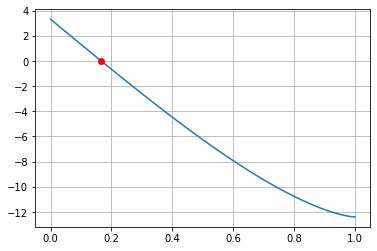

In [44]:

def f(h):  # Funcion Volumen - Volumen especifico (12.4) para hallar la raiz
    """
    Parameters
    -------
    h : Altura 

    Returns
    ------
    La diferencia entre el valor del volumen con h y el volumen 12.4
    """
    r = 1
    L = 10 
    v = 12.4
    part_1 = (1/2)*np.pi*(r**2)-(r**2)*(np.arcsin(h/r))
    part_2 = h*((r**2-h**2)**(1/2))
    return L*(part_1-part_2)-v


h = np.linspace(0 ,1,101)

plt.plot(h,f(h))
root = optimize.newton(f,0.2) # Uso de  Newton-Raphson

plt.plot(root,f(root),"ro")
plt.grid()
print("La altura es", root, "pies")

## Punto 4
\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}


alpha es 32.97217482236639


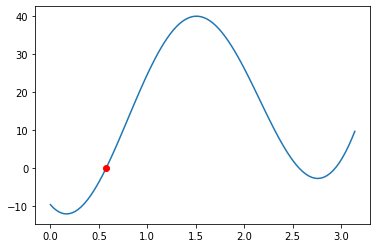

In [45]:
def alpha(a): # Funcion que debe dar cero si a es el angulo correcto
              # Si alpha(33°) es aprox 0, es correcto
    """
    Parameters
    ----------
    a : Angulo del auto

    Returns
    -------
    Valor de la ecuacion, cuando es cero, el auto esta en el maximo para no
    rozar

    """
    l = 89
    h = 49
    D = 55
    beta = (11.5)*np.pi/180
    A = l*np.sin(beta)
    B = l*np.cos(beta)
    C = (h+0.5*D)*np.sin(beta)-0.5*D*np.tan(beta)
    E = (h+0.5*D)*np.cos(beta)-0.5*D
    part_1 = A*np.cos(a)*np.sin(a)
    part_2 = (B)*(np.sin(a)**2)-C*np.cos(a)-E*np.sin(a)
    return part_1+part_2

a = np.linspace(0,np.pi,100)

plt.plot(a,alpha(a))
root = optimize.bisect(alpha,0,1) # Uso del metodo de biseccion
plt.plot(root,alpha(root),"ro")

print("alpha es", root*180/np.pi)


# Punto 5
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}

\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

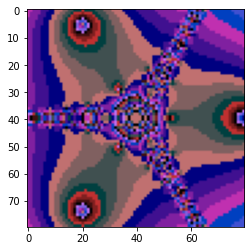

In [46]:
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  
a = 0.2
Niteraciones = 120
eps = 1E-8  # Epsilon utilizado

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy:   # Creacion de los puntos en x,y 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):  # Si alcanzo el valor de epsilon detener y asigar
                                # Color en base a las iteraciones
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16 # Asignacion del color
      
      image.putpixel((x,y), (r,g,b) )
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
